<a href="https://colab.research.google.com/github/RadhaMaredi/python_task_programs/blob/master/Completed%20tasks/cnn_object_detection/CNN_Mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

---



---



### Importing the libraries

In [ ]:
!pip install tensorflow==2.2.0

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/home/neosoft/Desktop/jupyter/mask_dataset (1)/mask_dataset/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1088 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/home/neosoft/Desktop/jupyter/mask_dataset (1)/mask_dataset/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 98 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.ker(pool_size=2, strides=2))as.layers.MaxPool2D

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
34/34 [==============================] - 12s 364ms/step - loss: 0.5662 - accuracy: 0.7040 - val_loss: 0.3452 - val_accuracy: 0.8163
Epoch 2/25
34/34 [==============================] - 11s 329ms/step - loss: 0.3461 - accuracy: 0.8336 - val_loss: 0.2690 - val_accuracy: 0.8469
Epoch 3/25
34/34 [==============================] - 13s 377ms/step - loss: 0.2822 - accuracy: 0.8814 - val_loss: 0.2202 - val_accuracy: 0.8878
Epoch 4/25
34/34 [==============================] - 13s 394ms/step - loss: 0.2469 - accuracy: 0.8906 - val_loss: 0.1439 - val_accuracy: 0.9592
Epoch 5/25
34/34 [==============================] - 12s 348ms/step - loss: 0.2372 - accuracy: 0.8989 - val_loss: 0.3005 - val_accuracy: 0.8367
Epoch 6/25
34/34 [==============================] - 13s 381ms/step - loss: 0.2119 - accuracy: 0.9136 - val_loss: 0.2450 - val_accuracy: 0.8878
Epoch 7/25
34/34 [==============================] - 11s 322ms/step - loss: 0.1865 - accuracy: 0.9292 - val_loss: 0.1807 - val_accuracy: 0.9184

## Part 4 - Making a single prediction

In [ ]:
import cv2
from matplotlib import pyplot as plt

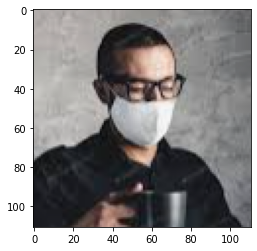

In [ ]:
predict_img = cv2.imread("/home/neosoft/Desktop/jupyter/mask_dataset (1)/mask_dataset/image_2022_04_25T12_57_35_865Z.png")
image = cv2.cvtColor(predict_img, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
#from keras.preprocessing import image
test_image = image.load_img("/home/neosoft/Desktop/jupyter/mask_dataset (1)/mask_dataset/image_2022_04_25T12_57_35_865Z.png", target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'perfectly wore mask'
else:
  prediction = 'incorrectly wore mask'

In [ ]:
print(prediction)

perfectly wore mask
